In [6]:
#IMPORTING the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display as ipd
from glob import glob
import librosa
import seaborn as sns
import librosa.display
import skimage.io
import os

In [7]:
import numpy as np
# Multihot to eventroll function
def eventroll_to_multihot_vector(eventroll):
    """
    Parameters
    ----------
    eventroll : np.array
        Eventroll matrix of shape=(11, 1000).
    
    Returns
    -------
    np.array
        A multihot vector of shape=(10,)
    """
    
    # findout active events:
    active_events = (eventroll.sum(axis=1) >= 0.5).astype('float')
    
    # remove silence class:
    return np.delete(active_events, 8)


In [3]:
# Making the numpy array of X input
X=np.zeros((10000,64,1000))
i=0
dir_name="../input/assigement2-data/X"
for filename in os.listdir("../input/assigement2-data/X"):
    #print(filename)
    file_path="../input/assigement2-data/X"+filename
    file=np.load(os.path.join(dir_name, filename))
    i=i+1
    sz=len(filename)
    j=0
    num=0
    while(filename[j]!='_'):
      j=j+1
    j=j+1
    while(j<sz-4):
      num=num*10+int(ord(filename[j])-ord('0'))
      j=j+1
    X[num]=file[0]
 

In [4]:
print(X.shape)

(10000, 64, 1000)


In [5]:
# Making the Y input 
Y=np.zeros((10000,10))
i=0
dir_name2="../input/assigement2-data/Y"
for filename in os.listdir("../input/assigement2-data/Y"):
    # print(filename)
    file_path="../input/assigement2-data/Y"+filename
    file=np.load(os.path.join(dir_name2, filename))
    # labels.append(eventroll_to_multihot_vector(file))
    i=i+1
    sz=len(filename)
    j=0
    num=0
    while(filename[j]!='_'):
      j=j+1
    j=j+1
    while(j<sz-4):
      num=num*10+int(ord(filename[j])-ord('0'))
      j=j+1
    Y[num]=eventroll_to_multihot_vector(file)


In [6]:
print(Y[0].shape)

(10,)


In [12]:
# Counting the Specific class for checking imbalance
count=0
for i in range(1000):
    flag=0;
    for j in range(10):
        if(Y[i][j]==1 and j==8):
            flag=1
    if(flag):
        count=count+1
print(count)  

923


In [ ]:
for i in (list_y):
  print(i)

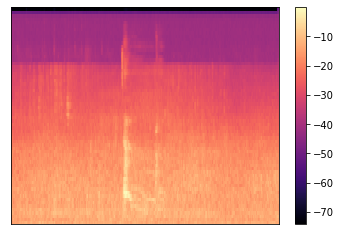

In [ ]:
import librosa
import librosa.display
S_db = librosa.amplitude_to_db(arr_x[0], ref=np.max)
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

In [45]:
# X=[]
# Y=[]
# for i in range(0,10000):
#     X.append(arr_x[i])
#     Y.append(arr_y[i])


In [ ]:
# X=  np.array(X)
# Y= np.array(Y)

In [7]:
# Making the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [8]:
# Reshaping the data 
X_train = X_train.reshape(8000,64, 1000, 1)
X_test = X_test.reshape(2000,64, 1000, 1)
X_train = X_train.astype('float32')
X_test= X_test.astype('float32')

In [9]:
print(X_train.shape)

(8000, 64, 1000, 1)


In [48]:
import keras.backend as K
import tensorflow as tf
def get_f1(y_true, y_hat): #taken from old keras source code
    f1s = [0, 0, 0]

    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_hat, tf.float64)

    for i, axis in enumerate([None, 0]):
        TP = tf.count_nonzero(y_pred * y_true, axis=axis)
        FP = tf.count_nonzero(y_pred * (y_true - 1), axis=axis)
        FN = tf.count_nonzero((y_pred - 1) * y_true, axis=axis)

        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * precision * recall / (precision + recall)

        f1s[i] = tf.reduce_mean(f1)

    weights = tf.reduce_sum(y_true, axis=0)
    weights /= tf.reduce_sum(weights)

    f1s[2] = tf.reduce_sum(f1 * weights)

    micro, macro, weighted = f1s
    return micro, macro, weighted

In [ ]:
# Library for focal loss
! pip install focal_loss

In [11]:
#Making the CNN Based Model
import keras
from keras import regularizers, activations
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import layers
import tensorflow as tf
from focal_loss import BinaryFocalLoss


model = models.Sequential()
model.add(layers.Conv2D(24, (3, 3), activation='relu', input_shape=(64, 1000, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(48, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(layers.Dense(300, activation="relu"))
model.add(Dropout(0.2))
model.add(layers.Dense(200, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss=BinaryFocalLoss(gamma=2), metrics=[keras.metrics.BinaryAccuracy()], optimizer='adam')

2022-11-13 09:01:01.291360: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 09:01:01.292627: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 09:01:01.447371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 09:01:01.448562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 09:01:01.449634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 998, 24)       240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 499, 24)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 497, 32)       6944      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 248, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 246, 48)       13872     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 123, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 121, 64)        2

In [ ]:
from datetime import datetime 
num_epochs = 200
num_batch_size = 4
start = datetime.now()
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

In [16]:
#Saving the  model
model.save("assigement2_f3.h5")

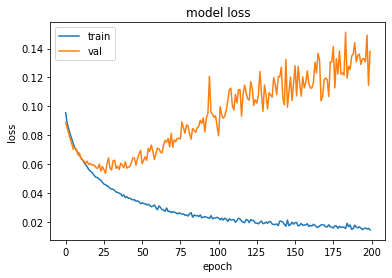

KeyError: 'accuracy'

In [15]:
# Plotting the model
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
y_hat=model.predict(X_test)

In [21]:
y_hat=y_hat.round()

In [ ]:
lst=[0,0,0,0,0,0,0,0,0,0]
for i in range(400):
  for j in range(10):
    print(y_hat[i][j])
    print(y_test[i][j])
    if(y_hat[i][j]==y_test[i][j]):
       lst[j]=lst[j]+1
for j in lst:
  print(j/400)

In [23]:
for j in lst:
  print(j/400)

0.8225

0.92

0.8925

0.785

0.875

0.9425

0.9475

0.9075

0.88

0.935


In [24]:
lst90=[0,0,0,0,0,0,0,0,0,0]
lst91=[0,0,0,0,0,0,0,0,0,0]
for i in range(400):
  for j in range(10):
    lst90[j]=lst90[j]+y_hat[i][j]
    lst91[j]=lst91[j]+y_test[i][j]


In [25]:
print(lst90)

[58.0, 31.0, 41.0, 88.0, 34.0, 38.0, 47.0, 44.0, 376.0, 49.0]


In [26]:
lst91

[61.0, 35.0, 52.0, 86.0, 50.0, 49.0, 54.0, 47.0, 366.0, 43.0]

In [27]:
y_hat[6]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1.], dtype=float32)

In [28]:
count=0
for i in range(0,400):
  flag=1
  for j in range(0,10):
    if(y_hat[0][j] != y_hat[i][j]):
      flag=0
  count=count+flag
print(count)

33


# ***Validation step***

In [29]:
# !unzip /content/drive/MyDrive/validation.zip -d /content/drive/MyDrive

In [4]:
val_x={}
list_valx=[]
i=0
dir_name2="../input/validation/dataset/X"
for filename in os.listdir("../input/validation/dataset/X"):
    #print(filename)
    file_path="../input/validation/dataset/X"+filename
    file=np.load(os.path.join(dir_name2, filename))
    i=i+1
    sz=len(filename)
    j=0
    num=0
    while(filename[j]!='_'):
      j=j+1
    j=j+1
    while(j<sz-4):
      num=num*10+int(ord(filename[j])-ord('0'))
      j=j+1
    val_x[num]=file[0]
    list_valx.append(num)
    #print(num)
 
print(len(val_x))


2000


In [5]:
print(len(list_valx))

2000


In [8]:
val_y={}
i=0
list_valy=[]
dir_name3="../input/validation/dataset/Y"
for filename in os.listdir("../input/validation/dataset/Y"):
    # print(filename)
    file_path="../input/validation/dataset/Y"+filename
    file=np.load(os.path.join(dir_name3, filename))
    # labels.append(eventroll_to_multihot_vector(file))
    i=i+1
    sz=len(filename)
    j=0
    num=0
    while(filename[j]!='_'):
      j=j+1
    j=j+1
    while(j<sz-4):
      num=num*10+int(ord(filename[j])-ord('0'))
      j=j+1
    val_y[num]=eventroll_to_multihot_vector(file)
    list_valy.append(num)


In [9]:
print(len(val_y))

2000


In [10]:
x_val=[]
y_val=[]
for i in list_valx:
  x_val.append(val_x[i])
  y_val.append(val_y[i])

In [11]:
print(len(x_val))

2000


In [12]:
x_val=np.array(x_val)
x_val = x_val.reshape(2000,64, 1000, 1)


In [20]:
import keras
from focal_loss import BinaryFocalLoss

In [32]:
model =  keras.models.load_model("../input/parametrs/assigement2_f.h5")

In [33]:
val_pred = model.predict(x_val)

In [34]:
val_pred=val_pred.round()

In [35]:
lst000=[0,0,0,0,0,0,0,0,0,0]
lst001=[0,0,0,0,0,0,0,0,0,0]
for i in range(2000):
  for j in range(10):
    lst000[j]=lst000[j]+val_pred[i][j]
    lst001[j]=lst001[j]+y_val[i][j]

In [36]:
lst000

[392.0, 428.0, 225.0, 400.0, 238.0, 168.0, 65.0, 137.0, 1521.0, 81.0]

In [37]:
lst001

[392.0, 436.0, 274.0, 444.0, 306.0, 221.0, 130.0, 143.0, 1246.0, 151.0]

In [38]:
from sklearn.metrics import f1_score, precision_score, recall_score

print(precision_score(val_pred,y_val,average="samples"))
print(recall_score(val_pred,y_val,average="samples"))
print(f1_score(val_pred,y_val,average="samples"))

0.7884833333333332
0.78795
0.7627896825396825


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_val, val_pred)

array([[[1558,   50],
        [  50,  342]],

       [[1484,   80],
        [  88,  348]],

       [[1712,   14],
        [  63,  211]],

       [[1421,  135],
        [ 179,  265]],

       [[1664,   30],
        [  98,  208]],

       [[1764,   15],
        [  68,  153]],

       [[1869,    1],
        [  66,   64]],

       [[1806,   51],
        [  57,   86]],

       [[ 389,  365],
        [  90, 1156]],

       [[1839,   10],
        [  80,   71]]])

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       392
           1       0.81      0.80      0.81       436
           2       0.94      0.77      0.85       274
           3       0.66      0.60      0.63       444
           4       0.87      0.68      0.76       306
           5       0.91      0.69      0.79       221
           6       0.98      0.49      0.66       130
           7       0.63      0.60      0.61       143
           8       0.76      0.93      0.84      1246
           9       0.88      0.47      0.61       151

   micro avg       0.79      0.78      0.79      3743
   macro avg       0.83      0.69      0.74      3743
weighted avg       0.81      0.78      0.78      3743
 samples avg       0.79      0.79      0.76      3743



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
lst12=[0,0,0,0,0,0,0,0,0,0]
count=0
for i in range(2000):
  for j in range(10):
    if(val_pred[i][j]==y_val[i][j]):
       lst12[j]=lst12[j]+1

for i in range(2000):
  flag=1
  for j in range(10):
    if(val_pred[i][j]!=y_val[i][j]):
       flag=0
  count=count+flag

for j in lst12:
  print(j/2000)
print("final ccc")
print(count/2000)

0.95
0.916
0.9615
0.843
0.936
0.9585
0.9665
0.946
0.7725
0.955
final ccc
0.4585


In [ ]:
! pip install focal_loss

In [2]:
import tensorflow as tf
import keras
from keras import regularizers, activations
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import layers
import tensorflow as tf
from focal_loss import BinaryFocalLoss
model =  keras.models.load_model("../input/parametrs/assigement2_f.h5")

2022-11-14 04:38:55.749905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 04:38:55.751103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 04:38:56.059555: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 04:38:56.060449: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 04:38:56.061248: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [3]:
val_pred1 = model.predict(x_val)

NameError: name 'x_val' is not defined

In [21]:
val_pred1=val_pred1.round()

In [22]:
lst000=[0,0,0,0,0,0,0,0,0,0]
lst001=[0,0,0,0,0,0,0,0,0,0]
for i in range(2000):
  for j in range(10):
    lst000[j]=lst000[j]+val_pred1[i][j]
    lst001[j]=lst001[j]+y_val[i][j]

In [23]:
lst000

[392.0, 428.0, 225.0, 400.0, 238.0, 168.0, 65.0, 137.0, 1521.0, 81.0]

In [24]:
lst001

[392.0, 436.0, 274.0, 444.0, 306.0, 221.0, 130.0, 143.0, 1246.0, 151.0]

In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score

print(precision_score(val_pred1,y_val,average="samples"))
print(recall_score(val_pred1,y_val,average="samples"))
print(f1_score(val_pred1,y_val,average="samples"))

0.7884833333333332
0.78795
0.7627896825396825


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_val, val_pred1)

array([[[1558,   50],
        [  50,  342]],

       [[1484,   80],
        [  88,  348]],

       [[1712,   14],
        [  63,  211]],

       [[1421,  135],
        [ 179,  265]],

       [[1664,   30],
        [  98,  208]],

       [[1764,   15],
        [  68,  153]],

       [[1869,    1],
        [  66,   64]],

       [[1806,   51],
        [  57,   86]],

       [[ 389,  365],
        [  90, 1156]],

       [[1839,   10],
        [  80,   71]]])

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_val, val_pred1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       392
           1       0.81      0.80      0.81       436
           2       0.94      0.77      0.85       274
           3       0.66      0.60      0.63       444
           4       0.87      0.68      0.76       306
           5       0.91      0.69      0.79       221
           6       0.98      0.49      0.66       130
           7       0.63      0.60      0.61       143
           8       0.76      0.93      0.84      1246
           9       0.88      0.47      0.61       151

   micro avg       0.79      0.78      0.79      3743
   macro avg       0.83      0.69      0.74      3743
weighted avg       0.81      0.78      0.78      3743
 samples avg       0.79      0.79      0.76      3743



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
lst13=[0,0,0,0,0,0,0,0,0,0]
count=0
for i in range(2000):
  for j in range(10):
    if(val_pred1[i][j]==y_val[i][j]):
       lst13[j]=lst13[j]+1

for i in range(2000):
  flag=1
  for j in range(10):
    if(val_pred1[i][j]!=y_val[i][j]):
       flag=0
  count=count+flag

for j in lst13:
  print(j/2000)
print("final ccc")
print(count/2000)

0.95
0.916
0.9615
0.843
0.936
0.9585
0.9665
0.946
0.7725
0.955
final ccc
0.4585


# # ***Making Prediction***

In [1]:
! pip install focal_loss

In [4]:
import tensorflow as tf
import keras
from keras import regularizers, activations
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import layers
import tensorflow as tf
from focal_loss import BinaryFocalLoss
model =  keras.models.load_model("../input/parametrs/assigement2_f.h5")

In [8]:
test_x={}
list_testx=[]
fname=[]
i=0
dir_name2="../input/ass2-test-data/test/X"
for filename in os.listdir("../input/ass2-test-data/test/X"):
    #print(filename)
    file_path="../input/ass2-test-data/test/X"+filename
    file=np.load(os.path.join(dir_name2, filename))
    i=i+1
    sz=len(filename)
    j=0
    num=0
    while(filename[j]!='_'):
      j=j+1
    j=j+1
    while(j<sz-4):
      num=num*10+int(ord(filename[j])-ord('0'))
      j=j+1
    test_x[num]=file[0]
    list_testx.append(num)
    fname.append(filename)
    #print(num)
 
print(len(test_x))


2500


In [9]:
test_y={}
i=0
list_valy=[]
dir_name3="../input/groud-truth/lables_test"
for filename in os.listdir("../input/groud-truth/lables_test"):
    # print(filename)
    file_path="../input/groud-truth/lables_test"+filename
    file=np.load(os.path.join(dir_name3, filename))
    # labels.append(eventroll_to_multihot_vector(file))
    i=i+1
    sz=len(filename)
    j=0
    num=0
    while(filename[j]!='_'):
      j=j+1
    j=j+1
    while(j<sz-4):
      num=num*10+int(ord(filename[j])-ord('0'))
      j=j+1
    test_y[num]=eventroll_to_multihot_vector(file)
    list_valy.append(num)

In [10]:
x_test=[]
y_test=[]
for i in list_testx:
    x_test.append(test_x[i])
    y_test.append(test_y[i])
  
  

In [11]:
print(len(y_test))

2500


In [12]:
y_test=np.array(y_test)

In [13]:
y_test.shape

(2500, 10)

In [14]:
x_test=np.array(x_test)
x_test = x_test.reshape(2500,64, 1000, 1)

In [15]:
predictions = model.predict(x_test)

2022-11-14 04:44:05.693038: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-14 04:44:08.042062: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [33]:
print(predictions.shape)

(2500, 10)


In [16]:
predictions=predictions.round()

In [ ]:
for i in predictions:
    print(i)

In [28]:
lst100=[0,0,0,0,0,0,0,0,0,0]
lst101=[0,0,0,0,0,0,0,0,0,0]
for i in range(2500):
  for j in range(10):
    lst100[j]=lst100[j]+predictions[i][j]
    lst101[j]=lst101[j]+y_test[i][j]

In [29]:
lst100

[336.0, 209.0, 278.0, 618.0, 301.0, 282.0, 332.0, 285.0, 2395.0, 226.0]

In [30]:
lst101

[400.0, 266.0, 284.0, 689.0, 341.0, 283.0, 377.0, 306.0, 2373.0, 251.0]

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score

print(precision_score(predictions,y_test,average="samples"))
print(recall_score(predictions,y_test,average="samples"))
print(f1_score(predictions,y_test,average="samples"))

0.7381971428571428
0.7801466666666667
0.7398184126984128


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from numpy import argmax
preds=[]
annotate = ['Alarm_bell_ringing','Blender','Cat','Dishes','Dog','Electric_shaver_toothbrush','Frying','Running_water','Speech','Vacuum_cleaner']
for p in predictions:
    one = []
    for i in range(0,10):
        if p[i]==1:
            one.append(annotate[i])
    if(len(one)==0):
        one.append('Silence')
    one = np.array(one)
    preds.append(one)


In [22]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, predictions)

array([[[1970,  130],
        [ 194,  206]],

       [[2126,  108],
        [ 165,  101]],

       [[2130,   86],
        [  92,  192]],

       [[1552,  259],
        [ 330,  359]],

       [[2005,  154],
        [ 194,  147]],

       [[2079,  138],
        [ 139,  144]],

       [[2046,   77],
        [ 122,  255]],

       [[2064,  130],
        [ 151,  155]],

       [[  37,   90],
        [  68, 2305]],

       [[2199,   50],
        [  75,  176]]])

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56       400
           1       0.48      0.38      0.43       266
           2       0.69      0.68      0.68       284
           3       0.58      0.52      0.55       689
           4       0.49      0.43      0.46       341
           5       0.51      0.51      0.51       283
           6       0.77      0.68      0.72       377
           7       0.54      0.51      0.52       306
           8       0.96      0.97      0.97      2373
           9       0.78      0.70      0.74       251

   micro avg       0.77      0.73      0.75      5570
   macro avg       0.64      0.59      0.61      5570
weighted avg       0.76      0.73      0.74      5570
 samples avg       0.78      0.74      0.74      5570



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
lst13=[0,0,0,0,0,0,0,0,0,0]
count=0
for i in range(2000):
  for j in range(10):
    if(predictions[i][j]==y_test[i][j]):
       lst13[j]=lst13[j]+1

for i in range(2000):
  flag=1
  for j in range(10):
    if(predictions[i][j]!=y_test[i][j]):
       flag=0
  count=count+flag

for j in lst13:
  print(j/2000)
print("final ccc")
print(count/2000)

0.8665
0.8925
0.9305
0.7595
0.868
0.887
0.923
0.8895
0.9345
0.9485
final ccc
0.4055


In [ ]:
for i in preds:
    print(i)

In [48]:
df1 = pd.DataFrame({"fname" : fname, "predictions" : preds})
df1.to_csv("ass2_submission_f.csv", index=False)